In [1]:
# !pip3 install medpy -i https://pypi.tuna.tsinghua.edu.cn/simple
# !pip3 install nibabel -i https://pypi.tuna.tsinghua.edu.cn/simple
# !pip3 install pynrrd -i https://pypi.tuna.tsinghua.edu.cn/simple

# pip3 install torch==1.8.0+cu111 torchvision==0.9.0+cu111 torchaudio==0.8.0 -i https://pypi.tuna.tsinghua.edu.cn/simple

In [2]:
# cd dataloaders
# 执行:CTM_data_processing-sitk.ipynb
# 备注:和UA-MT以及VNet共用一个数据预处理程序,若已经运行过,则不必要在重复运行

In [3]:
# !cd ../code
# !python3 train_VNet_Binary_CTM.py --batch_size 4 --gpu "3"  #,5,6,7"

In [4]:
# !python3 test_VNet_Binary_CTM.py --gpu '3'

## 后处理

## dice/jc/hd/asd的violin图/箱图

,Unnamed: 0,dice,jc,hd,asd
0,B1756747,0.934407,0.876889,2.000000,0.570287
1,1735950,0.946464,0.898369,1.732051,0.558587
2,B1632110,0.946190,0.897875,1.732051,0.393972
3,b930124,0.946660,0.898723,1.414214,0.989795
4,B1536553,0.955556,0.914894,1.732051,0.886522


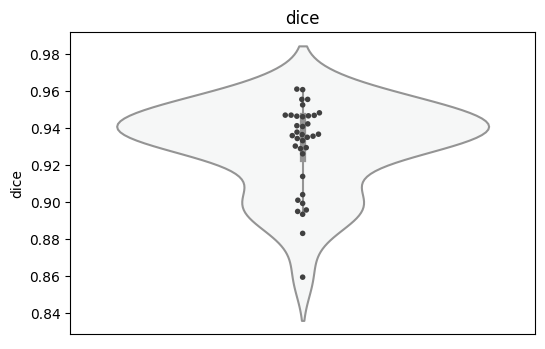

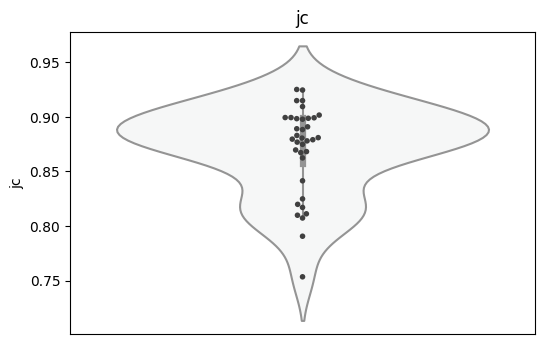

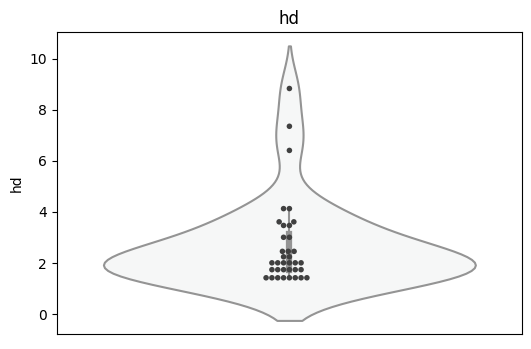

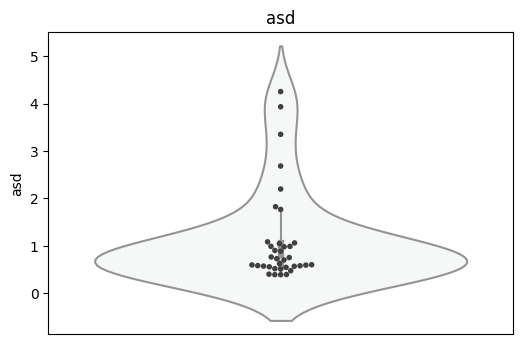

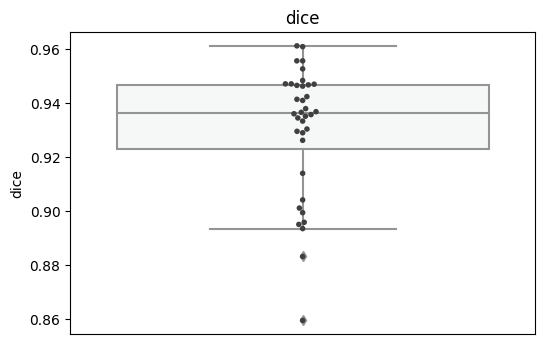

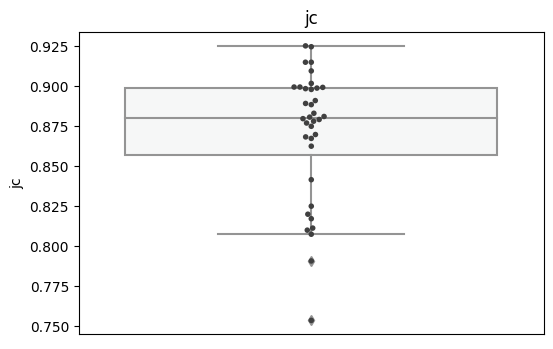

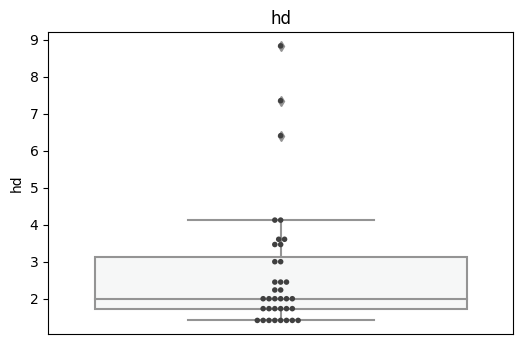

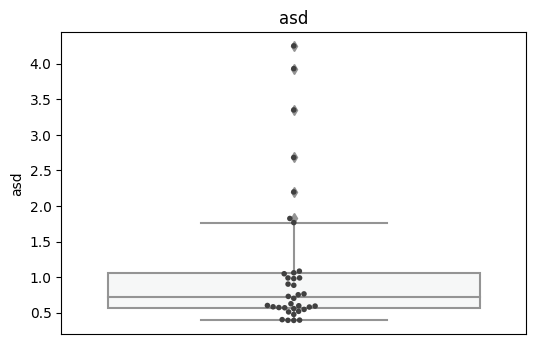

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from post_utils import get_proc_df_binary, get_voilinplot_binary, get_boxplot_binary, get_images, imshow

results_dir = "../model/prediction/VNet_Binary_CTM_post"
filename = "../model/prediction/VNet_Binary_CTM_post/metrics_test_set.csv"
results_raw = pd.read_csv(filename)
display(results_raw.head())

# 删除异常样本
results_raw = results_raw.drop(results_raw[results_raw['dice']<0.65].index)

# violinplot:
filename = os.path.join(results_dir,'voilinplot of pred dice on test-set.png')
proc_df = get_proc_df_binary(results_raw,metric='dice')
get_voilinplot_binary(proc_df,'dice',filename)

filename = os.path.join(results_dir,'voilinplot of pred jc on test-set.png')
proc_df = get_proc_df_binary(results_raw,metric='jc')
get_voilinplot_binary(proc_df,'jc',filename)

filename = os.path.join(results_dir,'voilinplot of pred hd on test-set.png')
proc_df = get_proc_df_binary(results_raw,metric='hd')
get_voilinplot_binary(proc_df,'hd',filename)

filename = os.path.join(results_dir,'voilinplot of pred asd on test-set.png')
proc_df = get_proc_df_binary(results_raw,metric='asd')
get_voilinplot_binary(proc_df,'asd',filename)

# boxplot:
filename = os.path.join(results_dir,'boxplot of pred dice on test-set.png')
proc_df = get_proc_df_binary(results_raw,metric='dice')
get_boxplot_binary(proc_df,'dice',filename)

filename = os.path.join(results_dir,'boxplot of pred jc on test-set.png')
proc_df = get_proc_df_binary(results_raw,metric='jc')
get_boxplot_binary(proc_df,'jc',filename)

filename = os.path.join(results_dir,'boxplot of pred hd on test-set.png')
proc_df = get_proc_df_binary(results_raw,metric='hd')
get_boxplot_binary(proc_df,'hd',filename)

filename = os.path.join(results_dir,'boxplot of pred asd on test-set.png')
proc_df = get_proc_df_binary(results_raw,metric='asd')
get_boxplot_binary(proc_df,'asd',filename)

## 画自动分割mask对比图

patients
 ['B1756747' '1735950' 'B1632110' 'b930124' 'B1536553' 'B928647' '1182723'
 '1261721' '1352900' 'B1182723' '643486' 'b936932-dingzi' 'B1694915'
 'B1006763' '1678746' 'B1424004' 'B1328036' 'B1425167' '945286'
 'b1460036-thoracic' 'B759663' 'b1198882' 'B1521755' '1371504' 'B825869'
 'B1352900' 'B976555' '840383' 'B805736' 'b1427578' '1700637-neck'
 'B1330032' '1027338' '772230' 'B617407' '820056']
images.shape:
 (30, 1, 140, 140)


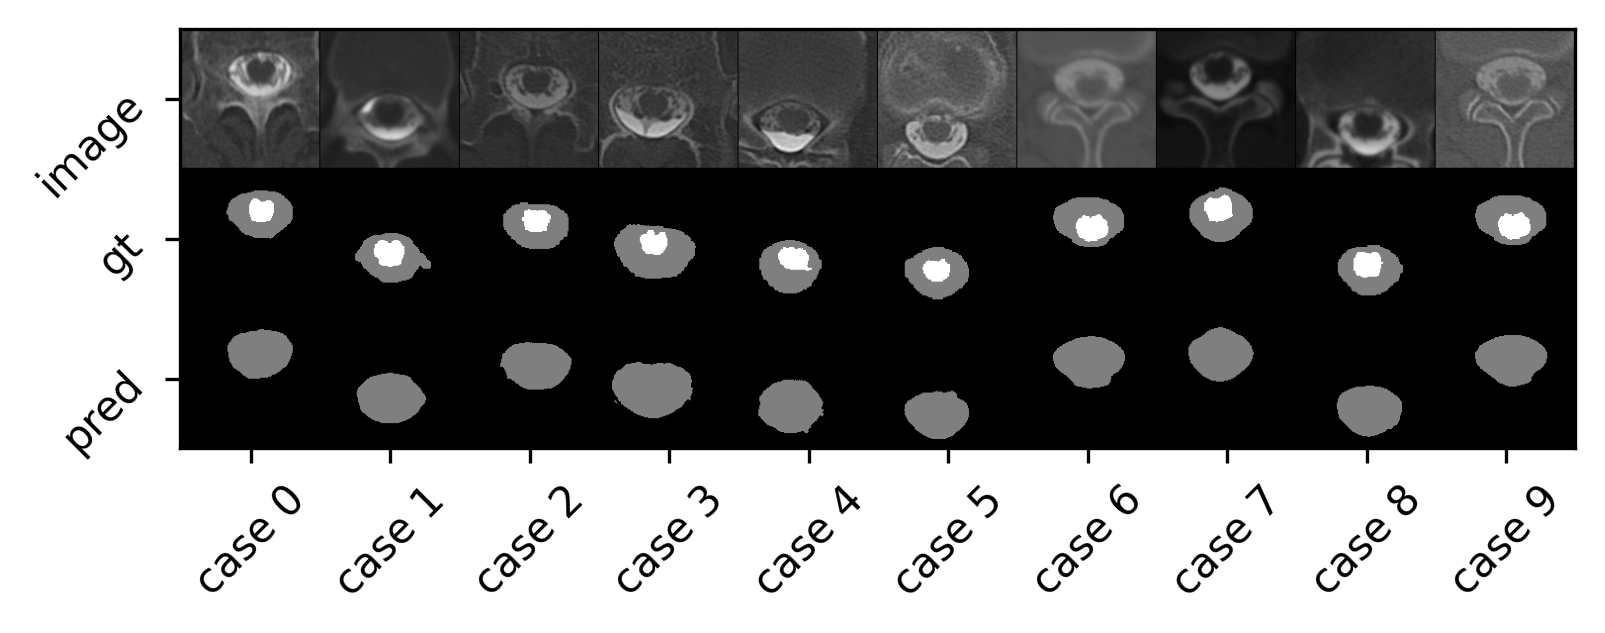

In [8]:
import torchvision
patients = results_raw['Unnamed: 0'].values
print("patients\n",patients)
# get images
n_case = 10
images = get_images(results_dir,patients[:n_case])
# show images
imshow(torchvision.utils.make_grid(images, nrow=3, padding=1), 
       n_case=n_case,
       filename=os.path.join(results_dir,'pred_mask vs gt_mask.png')
      )
